In [ ]:
# Import required library
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!gdown "19OE0VkTkFMO7jodUbsWaHfi0dFx9NEBF" -O 'train.csv'

Downloading...
From: https://drive.google.com/uc?id=19OE0VkTkFMO7jodUbsWaHfi0dFx9NEBF
To: /content/train.csv
100% 98.6M/98.6M [00:03<00:00, 30.3MB/s]


# DATA ANALYSIS & PREPROCESSING

In [ ]:
dfs = pd.read_csv("train.csv")

dfs.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
dfs.shape

(20800, 5)

In [ ]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [ ]:
# Check data duplikat
dup_rows = dfs.duplicated()
dfs.loc[dup_rows]

,id,title,author,text,label


In [ ]:
# Jika ada data duplikat akan di hapus
dfs.drop_duplicates(inplace=True)
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 975.0+ KB


In [ ]:
# Menampilkan missing values pada setiap row
dfs.loc[dfs.isnull().any(axis=1)]

,id,title,author,text,label
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
20,20,News: Hope For The GOP: A Nude Paul Ryan Has J...,NaN,Email \nSince Donald Trump entered the electio...,1
23,23,Massachusetts Cop’s Wife Busted for Pinning Fa...,NaN,Massachusetts Cop’s Wife Busted for Pinning Fa...,1
31,31,Israel is Becoming Pivotal to China’s Mid-East...,NaN,Country: Israel While China is silently playin...,1
...,...,...,...,...,...
20745,20745,Thomas Frank Explores Whether Hillary Clinton ...,NaN,Thomas Frank Explores Whether Hillary Clinton ...,1
20768,20768,Osama bin Laden’s older brother rents out luxu...,NaN,Osama bin Laden’s older brother rents out luxu...,1
20771,20771,NaN,Letsbereal,DYN's Statement on Last Week's Botnet Attack h...,1
20772,20772,NaN,beersession,Kinda reminds me of when Carter gave away the ...,1


In [ ]:
# menghitung jumlah missing values pada setiap kolom dalam dataset
dfs.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [ ]:
# Karena data yang bersifat independen hanya text
# Maka dataset yang tidak memiliki nan values pada textnya akan di drop
dfs.loc[dfs['text'].isnull()]

,id,title,author,text,label
142,142,Gorafi Magazine : Entretien exclusif avec Bara...,NaN,NaN,1
573,573,Le top des recherches Google passe en top des ...,NaN,NaN,1
1200,1200,La Corée du Nord annonce avoir envoyé un missi...,NaN,NaN,1
1911,1911,Grand-Prix du Brésil – Romain Grosjean obtient...,NaN,NaN,1
2148,2148,Gorafi Magazine: Barack Obama « Je vous ai déj...,NaN,NaN,1
2169,2169,"#NDDL: Pour fêter l’autorisation des travaux, ...",NaN,NaN,1
2793,2793,«Pourquoi je suis candidat à la présidentielle...,NaN,NaN,1
3329,3329,GuinessBook : 100 millions d’Américains batten...,NaN,NaN,1
3729,3729,Les Américains ne sont plus qu’à quelques heur...,NaN,NaN,1
4288,4288,Hillary Clinton en 5 dates >> Le Gorafi,NaN,NaN,1


In [ ]:
# untuk menghapus missing values
df = dfs.dropna(subset=["text"])

In [ ]:
# menampilkan ulang jumlah missing values yang sudah di hapus apakah berhasil atau tidak
df.loc[dfs['text'].isnull()]

,id,title,author,text,label


In [ ]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.5+ MB


In [ ]:
dfs.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20761 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20761 non-null  int64 
 1   title   20203 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20761 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 973.2+ KB


In [ ]:
df.shape

(20761, 5)

([<matplotlib.patches.Wedge at 0x7f2102724df0>,
 [Text(-1.1999994195787675, 0.0011802587093727949, 'Fake'),
  Text(1.199999419689266, -0.00118014635731833, 'True')],
 [Text(-0.6999996614209477, 0.0006884842471341303, '50.0%'),
  Text(0.6999996614854052, -0.0006884187084356924, '50.0%')])

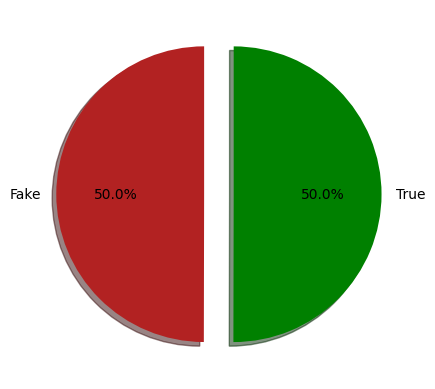

In [ ]:
# Check apakah data kita sudah balance atau belum
label_size = [df['label'].sum(), len(df['label'])-df['label'].sum()]
plt.pie(label_size, explode=[0.1,0.1], colors=['firebrick','green'],startangle=90,shadow=True,labels=['Fake','True'],autopct='%1.1f%%')

In [ ]:
# untuk menghitung jumlah kemunculan tiap kelas pada kolom 'label'
values = df['label'].value_counts()

# tampilkan jumlah kemunculan label 0 dan 1
print(values)

0    10387
1    10374
Name: label, dtype: int64


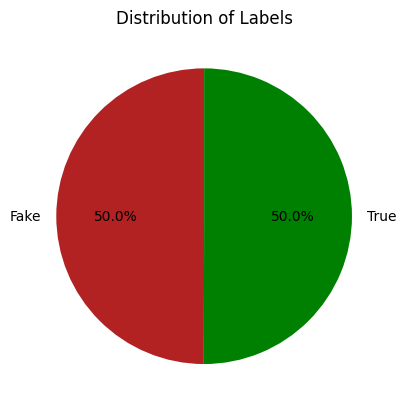

Label 0 count: 10387
Label 1 count: 10374


In [ ]:
# Hitung jumlah label 0 dan label 1
label_counts = df['label'].value_counts()

# Plot pie chart
label_size = [label_counts[1], label_counts[0]]
labels = ['Fake', 'True']
colors = ['firebrick', 'green']
plt.pie(label_size, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Labels')
plt.show()

# Tampilkan jumlah angka label 0 dan label 1
print('Label 0 count:', label_counts[0])
print('Label 1 count:', label_counts[1])

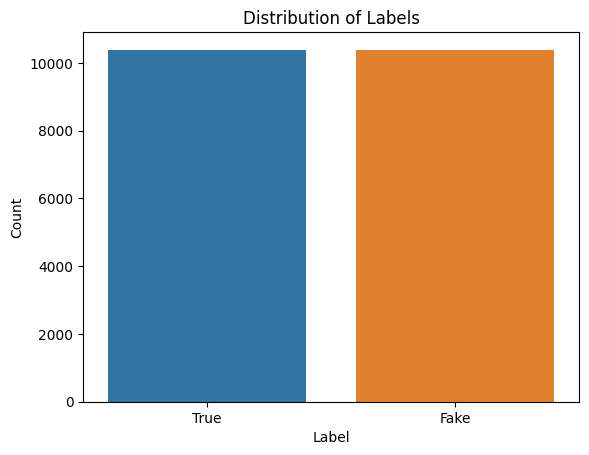

Label 0 count: 10387
Label 1 count: 10374


In [ ]:
import seaborn as sns

# Hitung jumlah label 0 dan label 1
label_counts = df['label'].value_counts()

# Plot bar plot
sns.countplot(data=df, x='label')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.xticks(ticks=[0, 1], labels=['True', 'Fake'])
plt.show()

# Tampilkan jumlah angka label 0 dan label 1
print('Label 0 count:', label_counts[0])
print('Label 1 count:', label_counts[1])


In [ ]:
df.head(0)

,id,title,author,text,label


In [ ]:
df.head(1)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1


In [ ]:
df.iloc[0]

id                                                        0
title     House Dem Aide: We Didn’t Even See Comey’s Let...
author                                        Darrell Lucus
text      House Dem Aide: We Didn’t Even See Comey’s Let...
label                                                     1
Name: 0, dtype: object

In [ ]:
# Menyatukan title, author, dan teks berita menjadi 1 content
df['content'] = df[['title', 'author', 'text']].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)

In [ ]:
df['content'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It Darrell Lucus House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members o

In [ ]:
df['content'][1]

'FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart Daniel J. Flynn Ever get the feeling your life circles the roundabout rather than heads in a straight line toward the intended destination? [Hillary Clinton remains the big woman on campus in leafy, liberal Wellesley, Massachusetts. Everywhere else votes her most likely to don her inauguration dress for the remainder of her days the way Miss Havisham forever wore that wedding dress.  Speaking of Great Expectations, Hillary Rodham overflowed with them 48 years ago when she first addressed a Wellesley graduating class. The president of the college informed those gathered in 1969 that the students needed “no debate so far as I could ascertain as to who their spokesman was to be” (kind of the like the Democratic primaries in 2016 minus the   terms unknown then even at a Seven Sisters school). “I am very glad that Miss Adams made it clear that what I am speaking for today is all of us —  the 400 of us,” Miss Rodham told her classmates

In [ ]:
df['content'][9]

'A Back-Channel Plan for Ukraine and Russia, Courtesy of Trump Associates - The New York Times Megan Twohey and Scott Shane A week before Michael T. Flynn resigned as national security adviser, a sealed proposal was   to his office, outlining a way for President Trump to lift sanctions against Russia. Mr. Flynn is gone, having been caught lying about his own discussion of sanctions with the Russian ambassador. But the proposal, a peace plan for Ukraine and Russia, remains, along with those pushing it: Michael D. Cohen, the president’s personal lawyer, who delivered the document Felix H. Sater, a business associate who helped Mr. Trump scout deals in Russia and a Ukrainian lawmaker trying to rise in a political opposition movement shaped in part by Mr. Trump’s former campaign manager Paul Manafort. At a time when Mr. Trump’s ties to Russia, and the people connected to him, are under heightened scrutiny  —   with investigations by American intelligence agencies, the F. B. I. and Congress

In [ ]:
df.head(10)

,id,title,author,text,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Consortiumne...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0,Jackie Mason: Hollywood Would Love Trump if He...
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1,Life: Life Of Luxury: Elton John’s 6 Favorite ...
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0,Benoît Hamon Wins French Socialist Party’s Pre...
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0,Excerpts From a Draft Script for Donald Trump’...
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0,"A Back-Channel Plan for Ukraine and Russia, Co..."


In [ ]:
# menghapus data yang tidak digunakan lagi
col_del = ['id', 'title', 'author', 'text']
df = df.drop(col_del, axis=1)

In [ ]:
df.head(15)

,label,content
0,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,1,Why the Truth Might Get You Fired Consortiumne...
3,1,15 Civilians Killed In Single US Airstrike Hav...
4,1,Iranian woman jailed for fictional unpublished...
5,0,Jackie Mason: Hollywood Would Love Trump if He...
6,1,Life: Life Of Luxury: Elton John’s 6 Favorite ...
7,0,Benoît Hamon Wins French Socialist Party’s Pre...
8,0,Excerpts From a Draft Script for Donald Trump’...
9,0,"A Back-Channel Plan for Ukraine and Russia, Co..."


## Text Cleaning

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
def clean_text(text):
  # Removing non-alphabetic characters and digits
  text = re.sub(r'[^a-zA-Z\s]', '', (text))
  text = re.sub(r'\d+', '', text)

  # Lowercasing
  text = text.lower()

  # Removing URLs
  text = re.sub(r'http\S+', '', text)

  # Removing usernames
  text = re.sub(r'@\S+', '', text)

  # Removing hashtags
  text = re.sub(r'#\S+', '', text)

  # Removing email addresses
  text = re.sub(r'\S+@\S+', '', text)

  # Removing phone numbers
  text = re.sub(r'\d{10,}', '', text)

  # Removing punctuation marks
  text = re.sub(r'[^\w\s]', '', text)

  # Removing extra whitespaces
  text = re.sub(r'\s+', ' ', text).strip()

  # Tokenization
  tokens = nltk.word_tokenize(text)

  # Removing stopwords
  stop_words = set(stopwords.words('english'))
  filtered_tokens = [token for token in tokens if token not in stop_words]

  # Lemmatization
  lemmatizer = WordNetLemmatizer()
  lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

  # Joining tokens back into a cleaned text string
  cleaned_text = ' '.join(lemmatized_tokens)

  return cleaned_text

In [ ]:
df['content'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It Darrell Lucus House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members o

In [ ]:
# Apply cleaning to dataset
df['content'] = df['content'].apply(clean_text)

In [ ]:
df['content'][0]

'house dem aide didnt even see comeys letter jason chaffetz tweeted darrell lucus house dem aide didnt even see comeys letter jason chaffetz tweeted darrell lucus october subscribe jason chaffetz stump american fork utah image courtesy michael jolley available creative commonsby license apology keith olbermann doubt worst person world weekfbi director james comey according house democratic aide look like also know secondworst person well turn comey sent nowinfamous letter announcing fbi looking email may related hillary clinton email server ranking democrat relevant committee didnt hear comey found via tweet one republican committee chairman know comey notified republican chairman democratic ranking member house intelligence judiciary oversight committee agency reviewing email recently discovered order see contained classified information long letter went oversight committee chairman jason chaffetz set political world ablaze tweet fbi dir informed fbi learned existence email appear per

In [ ]:
df.head(10)

,label,content
0,1,house dem aide didnt even see comeys letter ja...
1,0,flynn hillary clinton big woman campus breitba...
2,1,truth might get fired consortiumnewscom truth ...
3,1,civilian killed single u airstrike identified ...
4,1,iranian woman jailed fictional unpublished sto...
5,0,jackie mason hollywood would love trump bombed...
6,1,life life luxury elton john favorite shark pic...
7,0,benot hamon win french socialist party preside...
8,0,excerpt draft script donald trump qampa black ...
9,0,backchannel plan ukraine russia courtesy trump...


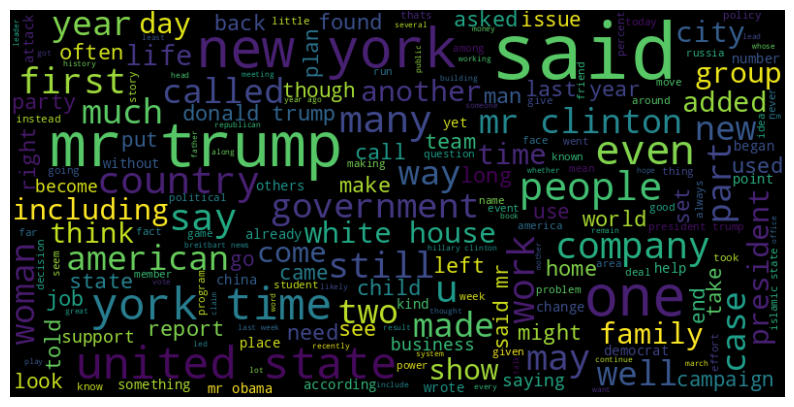

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

# visualize the frequent words for real news
all_words = " ".join([sentence for sentence in df['content'][df['label']==0]])

wordcloud = WordCloud(width=800, height=400, random_state=42, max_font_size=80).generate(all_words)

# plot the graph
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

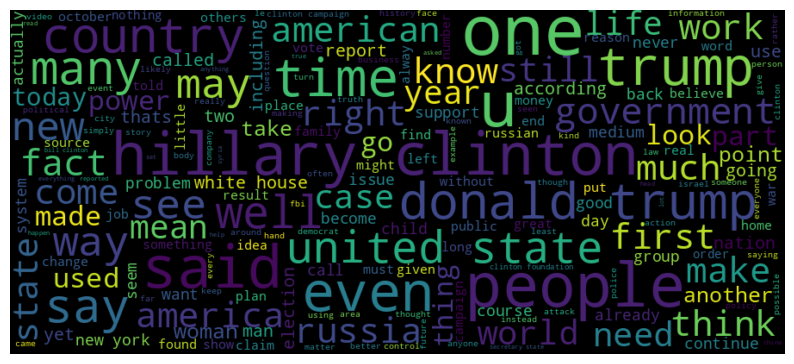

In [ ]:
# visualize the frequent words for fake news
all_words = " ".join([sentence for sentence in df['content'][df['label']==1]])

wordcloud = WordCloud(width=900, height=400, random_state=42, max_font_size=80).generate(all_words)

# plot the graph
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## TFDistilBert Embedding

In [ ]:
texts = [text for text in df.content]

max_len = 0
texts_len = []
for text in texts:
    texts_len.append(len(text.split()))
    max_len = max(len(text.split()), max_len)

# g = sns.countplot(x=texts_len)
print('Mean length of the texts:', np.mean(texts_len))

In [ ]:
!pip install transformers

## Distil Bert

distil bert tidak menggunakan token_type_ids

In [ ]:
import numpy as np
import tensorflow as tf
from transformers import DistilBertTokenizer, TFDistilBertModel

In [ ]:
# BERT tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = TFDistilBertModel.from_pretrained('distilbert-base-uncased')

### Cara 1 (distill bert)

In [ ]:
# Tokenize text and add special tokens
input_ids = []
attention_masks = []

for text in df['content']:
    encoded_dict = tokenizer.encode_plus(
                        text,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 200,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'tf',     # Return tensorflow tensors.
                        truncation=True  # specify truncation strategy
                   )

    input_ids.append(encoded_dict['input_ids'])
    attention_masks.append(encoded_dict['attention_mask'])

In [ ]:
# Convert the lists to tensors
input_ids = tf.concat(input_ids, axis=0)
attention_masks = tf.concat(attention_masks, axis=0)

In [ ]:
# Get the embeddings
batch_size = 16
embeddings = []

for i in range(0, len(df), batch_size):
    batch_input_ids = input_ids[i:i+batch_size]
    batch_attention_masks = attention_masks[i:i+batch_size]
    batch_embeddings = model(batch_input_ids, attention_mask=batch_attention_masks)[0][:,0,:]
    embeddings.append(batch_embeddings)

embeddings = tf.concat(embeddings, axis=0)

# Spliting Data

In [ ]:
# Validasi data
X = embeddings.numpy()
y = df['label'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Model Training

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
# Support Vector Machine
svm = SVC(probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [ ]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [ ]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [ ]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Model Evaluation

In [ ]:
import seaborn as sns
# from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score, accuracy_score,precision_score, recall_score

SVM

In [ ]:
# svm
# Hitung nilai confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plot confusion matrix dengan heatmap
sns.heatmap(cm_svm, annot=True, cmap='Blues', fmt='g',
            xticklabels=['REAL', 'FAKE'],
            yticklabels=['REAL', 'FAKE'])

# Set judul dan label pada sumbu x dan y
plt.title('SVM (TFDistilBERT)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Set map di atas dan kiri pada matrix
plt.tight_layout()

In [ ]:
# svm
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm, digits=5))

In [ ]:
# svm menghitung metrik evaluasi
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

# menampilkan nilai metrik evaluasi
print(f'Accuracy: {accuracy_svm:.5f}')
print(f'Precision: {precision_svm:.5f}')
print(f'Recall: {recall_svm:.5f}')
print(f'F1-score: {f1_svm:.5f}')

random forest

In [ ]:
# random forest
# Hitung nilai confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix dengan heatmap
sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='g',
            xticklabels=['REAL', 'FAKE'],
            yticklabels=['REAL', 'FAKE'])

# Set judul dan label pada sumbu x dan y
plt.title('Random Forest (TFDistilBERT)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Set map di atas dan kiri pada matrix
plt.tight_layout()

In [ ]:
# random forest
# print("Random Forest Confusion Metrics:\n", sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='g', cmap='Blues'))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf, digits=5))

In [ ]:
# random forest menghitung metrik evaluasi
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# menampilkan nilai metrik evaluasi
print(f'Accuracy: {accuracy_rf:.5f}')
print(f'Precision: {precision_rf:.5f}')
print(f'Recall: {recall_rf:.5f}')
print(f'F1-score: {f1_rf:.5f}')

decision tree

In [ ]:
# decision tree
# Hitung nilai confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Plot confusion matrix dengan heatmap
sns.heatmap(cm_dt, annot=True, cmap='Blues', fmt='g',
            xticklabels=['REAL', 'FAKE'],
            yticklabels=['REAL', 'FAKE'])

# Set judul dan label pada sumbu x dan y
plt.title('Decision Tree (TFDistilBERT)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Set map di atas dan kiri pada matrix
plt.tight_layout()

In [ ]:
# decision tree
print("decision tree Classification Report:\n", classification_report(y_test, y_pred_dt, digits=5))

In [ ]:
# decision tree menghitung metrik evaluasi
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# menampilkan nilai metrik evaluasi
print(f'Accuracy: {accuracy_dt:.5f}')
print(f'Precision: {precision_dt:.5f}')
print(f'Recall: {recall_dt:.5f}')
print(f'F1-score: {f1_dt:.5f}')

Logistic Regression

In [ ]:
# Logistic Regression
# Hitung nilai confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Plot confusion matrix dengan heatmap
sns.heatmap(cm_lr, annot=True, cmap='Blues', fmt='g',
            xticklabels=['REAL', 'FAKE'],
            yticklabels=['REAL', 'FAKE'])

# Set judul dan label pada sumbu x dan y
plt.title('Logistic Regression (TFDistilBERT)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Set map di atas dan kiri pada matrix
plt.tight_layout()

In [ ]:
# Logistic Regression
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr, digits=5))

In [ ]:
# Logistic Regression menghitung metrik evaluasi
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

# menampilkan nilai metrik evaluasi
print(f'Accuracy: {accuracy_lr:.5f}')
print(f'Precision: {precision_lr:.5f}')
print(f'Recall: {recall_lr:.5f}')
print(f'F1-score: {f1_lr:.5f}')

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Generate predictions for each model
y_preds = [y_pred_svm, y_pred_dt, y_pred_rf, y_pred_lr]

# Generate ROC AUC curves for each model
plt.figure(figsize=(8, 6))
models = ['Support Vector Machine', 'Decision Tree', 'Random Forest', 'Logistic Regression']
for i, y_pred in enumerate(y_preds):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s (AUC = %0.5f)' % (models[i], roc_auc))

# Plot the ROC AUC curves
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DistilBERT (ROC) Curves')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [ ]:
# Support Vector Machine
svm_probs = svm.predict_proba(X_test)[:, 1]
svm_fpr, svm_tpr, svm_thresholds = roc_curve(y_test, svm_probs)
svm_auc = roc_auc_score(y_test, svm_probs)
plt.plot(svm_fpr, svm_tpr, label=f'SVM AUC = {svm_auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('TFDistilBERT(SVM) ROC AUC Curve')
plt.legend()
plt.show()

In [ ]:
# Decision Tree
dt_probs = dt.predict_proba(X_test)[:, 1]
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dt_probs)
dt_auc = roc_auc_score(y_test, dt_probs)
plt.plot(dt_fpr, dt_tpr, label=f'DT AUC = {dt_auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('TFDistilBERT(DT) ROC AUC Curve')
plt.legend()
plt.show()

In [ ]:
# Random Forest
rf_probs = rf.predict_proba(X_test)[:, 1]
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
plt.plot(rf_fpr, rf_tpr, label=f'RF AUC = {rf_auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('TFDistilBERT(RF) ROC AUC Curve')
plt.legend()
plt.show()

In [ ]:
# Logistic Regression
lr_probs = lr.predict_proba(X_test)[:, 1]
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, lr_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
plt.plot(lr_fpr, lr_tpr, label=f'LR AUC = {lr_auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('TFDistilBERT(LR) ROC AUC Curve')
plt.legend()
plt.show()

In [ ]:
# Plot the ROC curves
plt.plot(svm_fpr, svm_tpr, label=f'SVM AUC = {svm_auc:.4f}')
plt.plot(dt_fpr, dt_tpr, label=f'DT AUC = {dt_auc:.4f}')
plt.plot(rf_fpr, rf_tpr, label=f'RF AUC = {rf_auc:.4f}')
plt.plot(lr_fpr, lr_tpr, label=f'LR AUC = {lr_auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('TFDistilBERT ROC AUC Curve')
plt.legend()
plt.show()